# Main Code Space

# 1. Data Loading

In [1]:
from processing import *
import matplotlib.pyplot as plt
import numpy as np

folder_paths = ['DataFile/data_250612', 'DataFile/data_250616', 'DataFile/data_250618']
all_trials = []

for folder_path in folder_paths:
    trials = Load_files(folder_path, pattern='cropped_*.h5')
    trials = [trial for trial in trials if 'test' not in trial['file']]     # Temporary remove Test set
    all_trials.extend(trials)

## Labeling ##
for trial in all_trials:
    trial['label'] = Generate_labels(trial)
    Convert_labels_to_int(trial, phase_to_int)

## EMG filtering ##
all_trials = process_all_emg(all_trials, lpf_fc=3, norm_method='max')

trial_num = len(all_trials)
print(f"Total trials: {trial_num}")

Total 4 files are now loaded...
Total 98 trials are completely loaded !!
Total 5 files are now loaded...
Total 145 trials are completely loaded !!
Total 5 files are now loaded...
Total 200 trials are completely loaded !!
Total trials: 443


# IMU Quaternion Calibration

In [ ]:
# for trial in all_trials:
#     CalibrateIMU(trial)
#     # CalibrateIMU_2(trial)

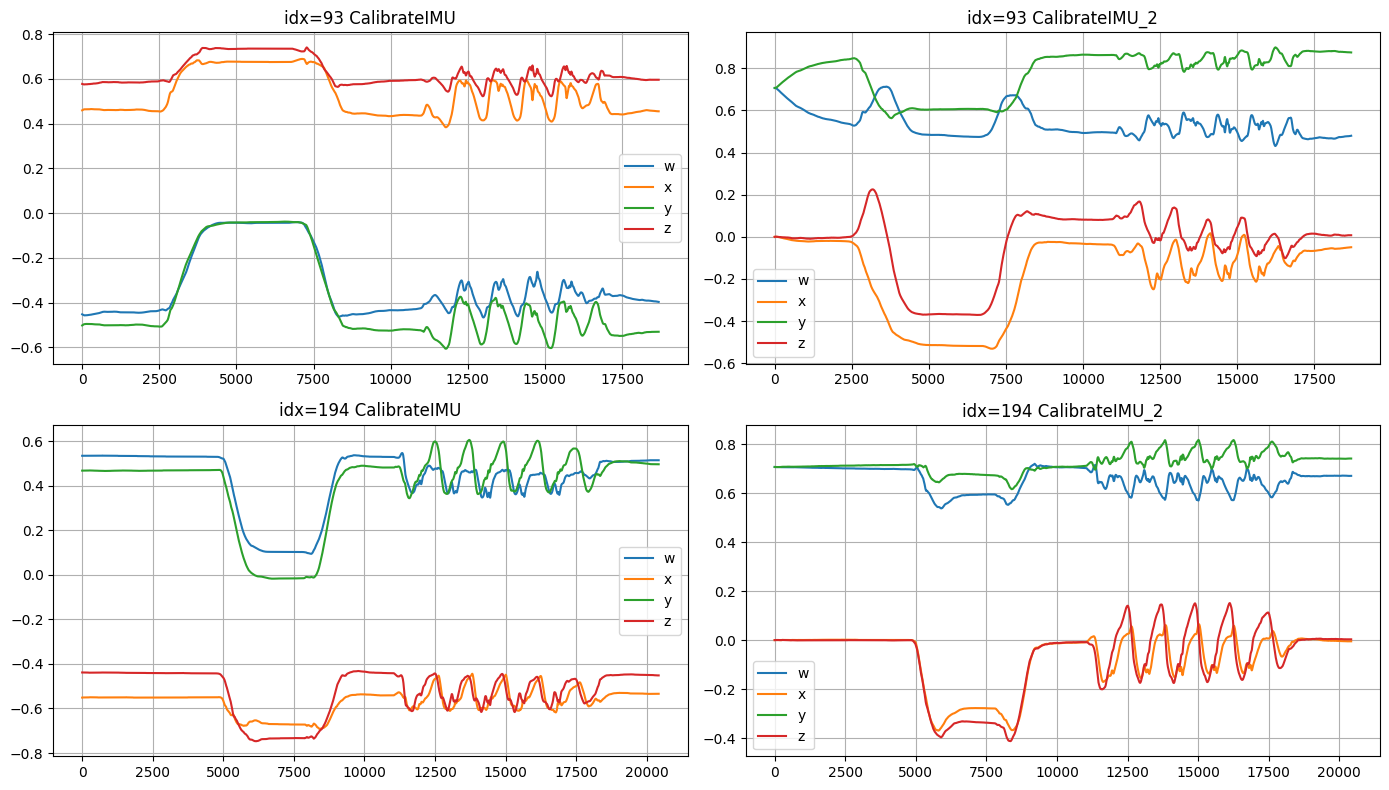

In [2]:
import copy

idx1 = 93  # 첫 번째 trial 인덱스 112
idx2 = 194  # 두 번째 trial 인덱스

# 첫 번째 trial
trial1_ori = copy.deepcopy(all_trials[idx1])
trial1_cal2 = copy.deepcopy(all_trials[idx1])
CalibrateIMU_3(trial1_ori)
CalibrateIMU_2(trial1_cal2)

# 두 번째 trial
trial2_ori = copy.deepcopy(all_trials[idx2])
trial2_cal2 = copy.deepcopy(all_trials[idx2])
CalibrateIMU_3(trial2_ori)
CalibrateIMU_2(trial2_cal2)

plt.figure(figsize=(14, 8))

# 1. idx1 - CalibrateIMU
plt.subplot(2, 2, 1)
plt.plot(trial1_ori['time'], trial1_ori['imu1'][:, 0], label='w')
plt.plot(trial1_ori['time'], trial1_ori['imu1'][:, 1], label='x')
plt.plot(trial1_ori['time'], trial1_ori['imu1'][:, 2], label='y')
plt.plot(trial1_ori['time'], trial1_ori['imu1'][:, 3], label='z')
plt.title(f'idx={idx1} CalibrateIMU')
plt.legend()
plt.grid(True)

# 2. idx1 - CalibrateIMU_2
plt.subplot(2, 2, 2)
plt.plot(trial1_cal2['time'], trial1_cal2['imu1'][:, 0], label='w')
plt.plot(trial1_cal2['time'], trial1_cal2['imu1'][:, 1], label='x')
plt.plot(trial1_cal2['time'], trial1_cal2['imu1'][:, 2], label='y')
plt.plot(trial1_cal2['time'], trial1_cal2['imu1'][:, 3], label='z')
plt.title(f'idx={idx1} CalibrateIMU_2')
plt.legend()
plt.grid(True)

# 3. idx2 - CalibrateIMU
plt.subplot(2, 2, 3)
plt.plot(trial2_ori['time'], trial2_ori['imu1'][:, 0], label='w')
plt.plot(trial2_ori['time'], trial2_ori['imu1'][:, 1], label='x')
plt.plot(trial2_ori['time'], trial2_ori['imu1'][:, 2], label='y')
plt.plot(trial2_ori['time'], trial2_ori['imu1'][:, 3], label='z')
plt.title(f'idx={idx2} CalibrateIMU')
plt.legend()
plt.grid(True)

# 4. idx2 - CalibrateIMU_2
plt.subplot(2, 2, 4)
plt.plot(trial2_cal2['time'], trial2_cal2['imu1'][:, 0], label='w')
plt.plot(trial2_cal2['time'], trial2_cal2['imu1'][:, 1], label='x')
plt.plot(trial2_cal2['time'], trial2_cal2['imu1'][:, 2], label='y')
plt.plot(trial2_cal2['time'], trial2_cal2['imu1'][:, 3], label='z')
plt.title(f'idx={idx2} CalibrateIMU_2')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Euler각으로 Plot

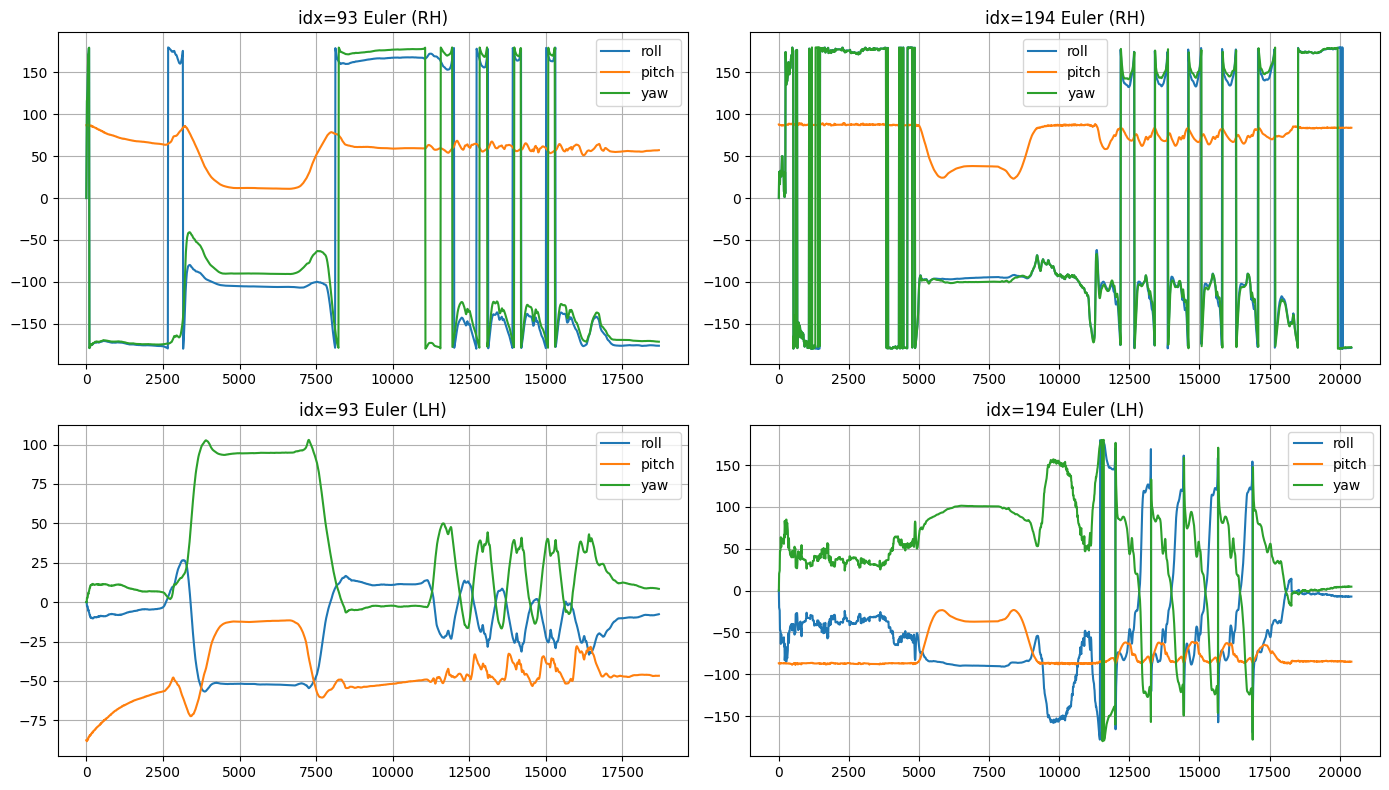

In [6]:
import copy

idx1 = 93
idx2 = 194

trial1 = copy.deepcopy(all_trials[idx1])
trial2 = copy.deepcopy(all_trials[idx2])

# DEGREE로 변환
def rad2deg_trial_euler(trial_euler):
    """
    trial_euler: dict with keys 'euler1' ~ 'euler10' (각각 (T, 3)), 'time'
    return: dict with 각 euler값이 degree로 변환된 결과
    """
    trial_euler_deg = {}
    for i in range(1, 11):
        key = f"euler{i}"
        trial_euler_deg[key] = np.rad2deg(trial_euler[key])
    trial_euler_deg['time'] = trial_euler['time']
    return trial_euler_deg

trial1_euler = CalibrateIMU_4(trial1)
trial2_euler = CalibrateIMU_4(trial2)
trial1_euler_deg = rad2deg_trial_euler(trial1_euler)
trial2_euler_deg = rad2deg_trial_euler(trial2_euler)

plt.figure(figsize=(14, 8))

# idx1
plt.subplot(2, 2, 1)
plt.plot(trial1_euler_deg['time'], trial1_euler_deg['euler1'][:, 0], label='roll')
plt.plot(trial1_euler_deg['time'], trial1_euler_deg['euler1'][:, 1], label='pitch')
plt.plot(trial1_euler_deg['time'], trial1_euler_deg['euler1'][:, 2], label='yaw')
plt.title(f'idx={idx1} Euler (RH)')
plt.legend()
plt.grid(True)

# idx2
plt.subplot(2, 2, 2)
plt.plot(trial2_euler_deg['time'], trial2_euler_deg['euler1'][:, 0], label='roll')
plt.plot(trial2_euler_deg['time'], trial2_euler_deg['euler1'][:, 1], label='pitch')
plt.plot(trial2_euler_deg['time'], trial2_euler_deg['euler1'][:, 2], label='yaw')
plt.title(f'idx={idx2} Euler (RH)')
plt.legend()
plt.grid(True)

# idx1 (LH)
plt.subplot(2, 2, 3)
plt.plot(trial1_euler_deg['time'], trial1_euler_deg['euler3'][:, 0], label='roll')
plt.plot(trial1_euler_deg['time'], trial1_euler_deg['euler3'][:, 1], label='pitch')
plt.plot(trial1_euler_deg['time'], trial1_euler_deg['euler3'][:, 2], label='yaw')
plt.title(f'idx={idx1} Euler (LH)')
plt.legend()
plt.grid(True)

# idx2 (LH)
plt.subplot(2, 2, 4)
plt.plot(trial2_euler_deg['time'], trial2_euler_deg['euler3'][:, 0], label='roll')
plt.plot(trial2_euler_deg['time'], trial2_euler_deg['euler3'][:, 1], label='pitch')
plt.plot(trial2_euler_deg['time'], trial2_euler_deg['euler3'][:, 2], label='yaw')
plt.title(f'idx={idx2} Euler (LH)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# IMU Visualization

Single IMU Test

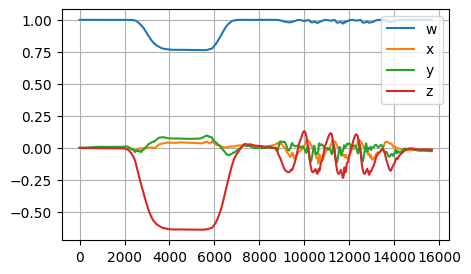

In [7]:
idx = 300    # Choose

plt.figure(figsize=(5, 3))
plt.plot(all_trials[idx]['time'], all_trials[idx]['imu1'][:, 0], label='w')
plt.plot(all_trials[idx]['time'], all_trials[idx]['imu1'][:, 1], label='x')
plt.plot(all_trials[idx]['time'], all_trials[idx]['imu1'][:, 2], label='y')
plt.plot(all_trials[idx]['time'], all_trials[idx]['imu1'][:, 3], label='z')
plt.legend()
plt.grid(True)

Total IMU

ValueError: x and y must have same first dimension, but have shapes (1, 1569) and (1569,)

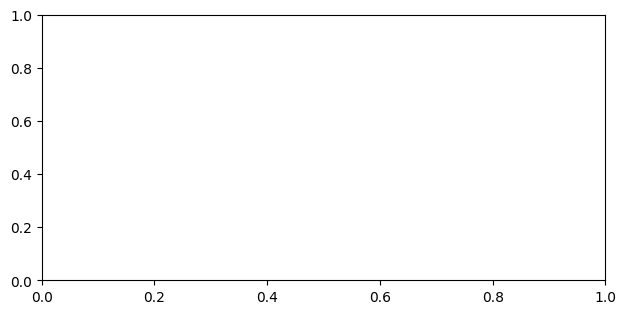

In [ ]:
# plt.figure(figsize=(16,20))

# plt.subplot(5, 2, 1)
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu1'][:, 0], label='w')
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu1'][:, 1], label='x')
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu1'][:, 2], label='y')
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu1'][:, 3], label='z')
# plt.title(f"{all_trials[idx]['file']} - {all_trials[idx]['trial']} [RH]")
# plt.legend()
# plt.grid(True)

# plt.subplot(5, 2, 2)
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu2'][:, 0], label='w')
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu2'][:, 1], label='x')
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu2'][:, 2], label='y')
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu2'][:, 3], label='z')
# plt.title("[RK]")
# plt.legend()
# plt.grid(True)

# plt.subplot(5, 2, 3)
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu3'][:, 0], label='w')
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu3'][:, 1], label='x')
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu3'][:, 2], label='y')
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu3'][:, 3], label='z')
# plt.title("[LH]")
# plt.legend()
# plt.grid(True)

# plt.subplot(5, 2, 4)
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu4'][:, 0], label='w')
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu4'][:, 1], label='x')
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu4'][:, 2], label='y')
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu4'][:, 3], label='z')
# plt.title("[LK]")
# plt.legend()
# plt.grid(True)

# plt.subplot(5, 2, 5)
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu5'][:, 0], label='w')
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu5'][:, 1], label='x')
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu5'][:, 2], label='y')
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu5'][:, 3], label='z')
# plt.title("[Pelvis]")
# plt.legend()
# plt.grid(True)

# plt.subplot(5, 2, 6)
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu6'][:, 0], label='w')
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu6'][:, 1], label='x')
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu6'][:, 2], label='y')
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu6'][:, 3], label='z')
# plt.title("[Trunk]")
# plt.legend()
# plt.grid(True)

# plt.subplot(5, 2, 7)
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu7'][:, 0], label='w')
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu7'][:, 1], label='x')
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu7'][:, 2], label='y')
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu7'][:, 3], label='z')
# plt.title("[RS]")
# plt.legend()
# plt.grid(True)

# plt.subplot(5, 2, 8)
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu8'][:, 0], label='w')
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu8'][:, 1], label='x')
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu8'][:, 2], label='y')
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu8'][:, 3], label='z')
# plt.title("[RE]")
# plt.legend()
# plt.grid(True)

# plt.subplot(5, 2, 9)
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu9'][:, 0], label='w')
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu9'][:, 1], label='x')
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu9'][:, 2], label='y')
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu9'][:, 3], label='z')
# plt.title("[LS]")
# plt.legend()
# plt.grid(True)

# plt.subplot(5, 2, 10)
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu10'][:, 0], label='w')
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu10'][:, 1], label='x')
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu10'][:, 2], label='y')
# plt.plot(all_trials[idx]['time'], all_trials[idx]['imu10'][:, 3], label='z')
# plt.title("[LE]")
# plt.legend()
# plt.grid(True)

# plt.show()